In [64]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import sklearn as sk
dataset = load_boston()

c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [65]:
x = dataset.data
y = dataset.target
x= pd.DataFrame(x)
# print("x 최솟값 : ",np.min(x))
# print("x 최댓값 : ",np.max(x))

In [66]:
# 스케일링 하기
scaler = StandardScaler()
# 가중치 생성후
scaler.fit(x)
# 변환
x = scaler.transform(x)
print("x 최솟값 : ",np.min(x))
print("x 최댓값 : ",np.max(x))

x 최솟값 :  -3.9071933049810337
x 최댓값 :  9.933930601860268


In [67]:
# 3. 모델구성
# 실습 train 0.7 이상
# 평가지표 R2 : 0.8 이상으로 뽑아내보기 / RMSE 사용

x_train, x_test,y_train,y_test = train_test_split(x,y,
    train_size=0.7,
    shuffle = True,
    random_state= 123
)

print(len(x_train))
print(len(x_test))

354
152


In [68]:
# 13개의 칼럼 을 가지고있는 데이터를 조회합니다
print(x.shape) #(506,13)
# print(x)
print(y.shape) #(506,)
# print(y)


(506, 13)
(506,)


In [69]:
# 사이킥 런의 칼럼 조회기능
print(dataset.feature_names)
print(len(dataset.feature_names))


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
13


In [70]:
# 사이킥런의 데이터 요약
# print(dataset.DESCR)

In [71]:
# 3. 모델구성
# 실습 train 0.7 이상
# 평가지표 R2 : 0.8 이상으로 뽑아내보기 / RMSE 사용

x_train, x_test,y_train,y_test = train_test_split(x,y,
    train_size=0.7,
    shuffle = True,
    random_state= 123
)

scaler = MinMaxScaler()
# 가중치 생성후
scaler.fit(x_train)
# x_train 의 가중치 변환
x_train = scaler.transform(x_train)
# x_test 는 변환만 !
x_test = scaler.transform(x_test)

print(len(x_train))
print(len(x_test))

354
152


In [72]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input


# 2. 모델구성 순차형
model = Sequential([
    Dense(50,input_dim=13,activation="relu"),
    Dense(50,activation="relu"),
    Dense(50,activation="relu"),
    Dense(50,activation="relu"),
    Dense(50,activation="relu"),
    Dense(1)
])


# 3. 모델구성 함수형
input1 = Input(shape=(13,))
dense1 = Dense(32,activation="relu")(input1)
dense2 = Dense(64,activation="relu")(dense1)
dense3 = Dense(128,activation="relu")(dense2)
dense4 = Dense(64,activation="relu")(dense3)
dense5 = Dense(32,activation="relu")(dense4)
output1 = Dense(1,activation="relu")(dense5)

model=Model(inputs=input1,outputs=output1)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_54 (Dense)            (None, 50)                700       
                                                                 
 dense_55 (Dense)            (None, 50)                2550      
                                                                 
 dense_56 (Dense)            (None, 50)                2550      
                                                                 
 dense_57 (Dense)            (None, 50)                2550      
                                                                 
 dense_58 (Dense)            (None, 50)                2550      
                                                                 
 dense_59 (Dense)            (None, 1)                 51  

In [73]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

path = "../_save/"

earlyStopping = EarlyStopping(monitor="val_loss",
                              mode="min",patience =10,
                              restore_best_weights=True,
                              verbose=1                              
                              )
# 모델체크포인트는 가장 낮은 val_loss 가 갱신 될 떄 마다 저장합니다.

mcp = ModelCheckpoint(
    monitor="val_loss",
    mode="auto",
    save_best_only=True,
    filepath= path+"MCP/keras30_ModelCheckPoint1.hdf5",
    verbose=1 
)
                    
    
model.compile(loss="mse",optimizer="adam")

# model.fit 이 반환한 기록을 저장
hist = model.fit(
                x_train,
                y_train,
                epochs=100,
                batch_size=3,
                validation_split=0.2,
                verbose=1,
                callbacks = [earlyStopping,mcp],
                
                )


Epoch 1/100
92/95 [============================>.] - ETA: 0s - loss: 290.7571
Epoch 00001: val_loss improved from inf to 65.25366, saving model to ../_save/MCP\keras30_ModelCheckPoint1.hdf5
95/95 [==============================] - 1s 6ms/step - loss: 284.3380 - val_loss: 65.2537
Epoch 2/100
81/95 [========================>.....] - ETA: 0s - loss: 69.0304
Epoch 00002: val_loss improved from 65.25366 to 37.95823, saving model to ../_save/MCP\keras30_ModelCheckPoint1.hdf5
95/95 [==============================] - 0s 4ms/step - loss: 64.7314 - val_loss: 37.9582
Epoch 3/100
77/95 [=======================>......] - ETA: 0s - loss: 46.3811
Epoch 00003: val_loss improved from 37.95823 to 29.37921, saving model to ../_save/MCP\keras30_ModelCheckPoint1.hdf5
95/95 [==============================] - 0s 4ms/step - loss: 48.1732 - val_loss: 29.3792
Epoch 4/100
95/95 [==============================] - ETA: 0s - loss: 32.9985
Epoch 00004: val_loss improved from 29.37921 to 21.74593, saving model to ../

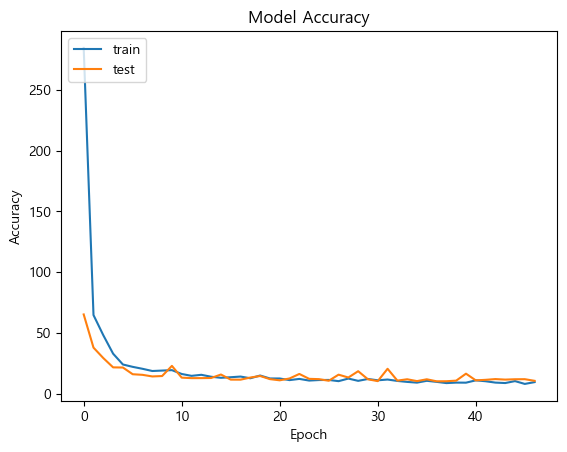

In [74]:
import matplotlib.pylab as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
# 모델저장

path = "../_save/"

# model.save_weights(path+"save_weight2.h5")

In [76]:
# 모델불러오기
from tensorflow.keras.models import load_model

path = "../_save/"

# 가중치 불러오기는 모델이 저장 되어 있어야 가능함
model.load_weights(path+"save_weight2.h5")

In [77]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_54 (Dense)            (None, 50)                700       
                                                                 
 dense_55 (Dense)            (None, 50)                2550      
                                                                 
 dense_56 (Dense)            (None, 50)                2550      
                                                                 
 dense_57 (Dense)            (None, 50)                2550      
                                                                 
 dense_58 (Dense)            (None, 50)                2550      
                                                                 
 dense_59 (Dense)            (None, 1)                 51  

In [80]:
# 평가 예측
loss = model.evaluate(x_test,y_test)


print("loss : ",loss)

5/5 [==============================] - 0s 1ms/step - loss: 52.1390
loss :  52.1390266418457
